In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

In [11]:
#loading dataset
from sklearn.datasets import load_boston
boston = load_boston()
print("Data format : {}".format(boston.data.shape))

Data format : (506, 13)


## Mglearn

In [12]:
#get dataset
X, y = mglearn.datasets.load_extended_boston()
print("Array shape X : {}".format(X.shape))
#here we have 506 items and 104 dimensions 

Array shape X : (506, 104)


C:\Users\nikit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


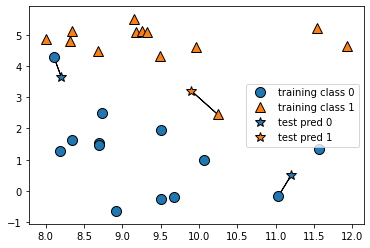

In [13]:
mglearn.plots.plot_knn_classification(n_neighbors = 1)

Here we added three news dots. Marked as stars. 

C:\Users\nikit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


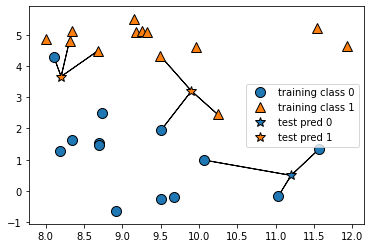

In [14]:
#usign voting 
mglearn.plots.plot_knn_classification(n_neighbors = 3)

## Sklearn

In [16]:
X, y = mglearn.datasets.make_forge()

In [18]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
clf = KNeighborsClassifier(n_neighbors = 3)

In [19]:
clf.fit(X_train, y_train)
print("Prognosis for test set: {}".format(clf.predict(X_test)))

Prognosis for test set: [1 0 1 0 1 0 0]


In [20]:
#Evaluate model
print("Correctness for test set: {:.2f}".format(clf.score(X_test, y_test)))

Correctness for test set: 0.86


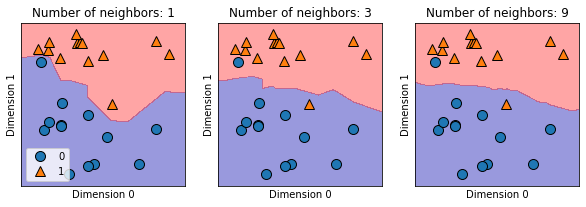

In [21]:
fig, axes = plt.subplots(1, 3, figsize = (10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    #creating classifier
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.5, ax = ax, alpha = 0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("Number of neighbors: {}".format(n_neighbors))
    ax.set_xlabel("Dimension 0")
    ax.set_ylabel("Dimension 1")
axes[0].legend(loc = 3)    

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [5]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 66)

In [6]:
#empty arrays for training data
training_accuracy = []
test_accuracy = []

In [7]:
#testing neighbors from 1 to 10
neighbors_settings = range(1, 11)

In [8]:
for n_neighbors in neighbors_settings:
    #building model
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    #accuracy on the training set
    training_accuracy.append(clf.score(X_train, y_train))
    #accuracy on the test set
    test_accuracy.append(clf.score(X_test, y_test))

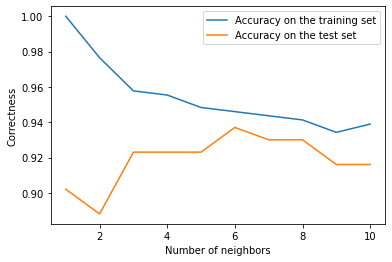

In [9]:
plt.plot(neighbors_settings, training_accuracy, label = "Accuracy on the training set")
plt.plot(neighbors_settings, test_accuracy, label = "Accuracy on the test set")
plt.ylabel("Correctness")
plt.xlabel("Number of neighbors")
plt.legend()

## K-neighbors regression 

In [10]:
#load dataset
X, y = mglearn.datasets.make_wave(n_samples = 40)

In [11]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [14]:
#creating model example and setting number of neighbors equal to 3
reg = KNeighborsRegressor(n_neighbors = 3)

In [15]:
#fitting the model
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [16]:
print("Prognosis for test set: \n{}".format(reg.predict(X_test)))

Prognosis for test set: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [17]:
print("R^2 on test set: {:.2f}".format(reg.score(X_test, y_test)))

R^2 on test set: 0.83


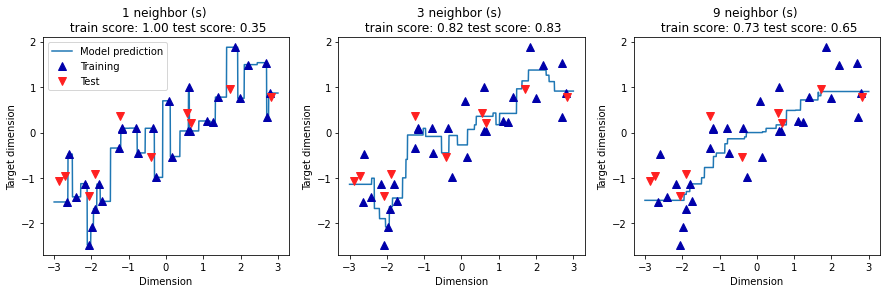

In [24]:
fig, axes = plt.subplots(1, 3, figsize = (15, 4))
#create 1000 points scattered between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    #obtain prediction, using 1, 3 and 9 neighbors
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c = mglearn.cm2(0), markersize = 8)
    ax.plot(X_test, y_test, 'v', c = mglearn.cm2(1), markersize = 8)
    
    ax.set_title(
        "{} neighbor (s) \n train score: {:.2f} test score: {:.2f}".
        format(n_neighbors, reg.score(X_train, y_train), 
              reg.score(X_test, y_test)))
    ax.set_xlabel("Dimension")
    ax.set_ylabel("Target dimension")    
    axes[0].legend(["Model prediction", "Training", "Test"], loc = 'best')